<a href="https://colab.research.google.com/github/Nichanan670510741/Nichanan/blob/main/229351_LAB10_02_670510741.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### ปฏิบัติการครั้งที่ 8

ดาวน์โหลดข้อมูลอุณหภูมิสูงสุดรายวันปี 1998-2019 จาก link ข้างล่างนี้  
https://donlapark.pages.dev/229351/data/CM_temp.csv

1. เปลี่ยนจากข้อมูลรายวันให้เป็นข้อมูลค่าเฉลี่ยรายเดือน
2. จงแบ่งข้อมูลโดยให้ Test set เป็นข้อมูลของ 24 เดือนสุดท้ายและ Training set เป็นข้อมูลก่อนหน้าทั้งหมด
3. ลองสร้างโมเดล Holt-Winters แบบต่างๆ (damped, non-damped, additive, multiplicative etc.) แล้วระบุโมเดลที่ดีที่ให้ค่า RMSE บน test set น้อยที่สุด
4. จงแสดงแผนภาพของข้อมูลจริงกับข้อมูลที่ได้ในข้อ 3

In [5]:
!wget -O CM_temp.csv https://donlapark.pages.dev/229351/data/CM_temp.csv

--2025-09-15 12:53:38--  https://donlapark.pages.dev/229351/data/CM_temp.csv
Resolving donlapark.pages.dev (donlapark.pages.dev)... 172.66.44.200, 172.66.47.56, 2606:4700:310c::ac42:2f38, ...
Connecting to donlapark.pages.dev (donlapark.pages.dev)|172.66.44.200|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 139473 (136K) [text/csv]
Saving to: ‘CM_temp.csv’

CM_temp.csv         100%[===================>] 136.20K  --.-KB/s    in 0.04s   

2025-09-15 12:53:38 (3.71 MB/s) - ‘CM_temp.csv’ saved [139473/139473]



In [6]:
# import module ที่ต้องใช้
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from datetime import datetime

In [7]:
# ฟังก์ชันที่เปลี่ยน string ให้เป็น datetime
def parser(dates):
  return datetime.strptime(dates, '%Y-%m-%d')

# parse_dates ชื่อของคอลัมน์ที่จะเปลี่ยนให้เป็น datetime
# index_col ชื่อของคอลัมน์ที่จะให้เป็น index
# date_parser ฟังก์ชันที่เปลี่ยน string ให้เป็น datetime
data = pd.read_csv('CM_temp.csv', parse_dates=['Date'],
                                        index_col='Date',
                                        date_parser=parser)

data.tail()

/tmp/ipython-input-2705365328.py:8: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  data = pd.read_csv('CM_temp.csv', parse_dates=['Date'],


,MaxTemp
Date,
2019-07-27,26.2
2019-07-28,34.2
2019-07-29,34.4
2019-07-30,33.5
2019-07-31,30.7


ข้อมูลที่ได้เป็นข้อมูลรายวัน ทำการหาค่าเฉลี่ยรายเดือนด้วย method `resample`

In [8]:
data_monthly = data['MaxTemp'].resample("M").mean()

data_monthly.head()

/tmp/ipython-input-3219926365.py:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  data_monthly = data['MaxTemp'].resample("M").mean()


,MaxTemp
Date,
1998-01-31,31.687097
1998-02-28,33.685714
1998-03-31,37.103226
1998-04-30,37.910000
1998-05-31,35.848387


In [9]:
def rmse(y_true,y_pred):
  # Inputs
  # y_true: actual value, y_pred: predicted values
  # Output: RMSE between y_true and y_pred
  return np.sqrt(np.mean(np.square(y_true-y_pred)))

1

In [10]:
data_monthly = data['MaxTemp'].resample("M").mean()
display(data_monthly.head())
display(data_monthly.tail())

/tmp/ipython-input-1098641386.py:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  data_monthly = data['MaxTemp'].resample("M").mean()


,MaxTemp
Date,
1998-01-31,31.687097
1998-02-28,33.685714
1998-03-31,37.103226
1998-04-30,37.910000
1998-05-31,35.848387


,MaxTemp
Date,
2019-03-31,37.051613
2019-04-30,39.716667
2019-05-31,37.680645
2019-06-30,35.466667
2019-07-31,34.070968


2

In [14]:
train_data = data_monthly[:-24]   # ข้อมูลก่อน 24 เดือนสุดท้าย
test_data  = data_monthly[-24:]   # ข้อมูล 24 เดือนสุดท้าย

print("Train set:",train_data.shape)
print("Test set :",test_data.shape)


Train set: (235,)
Test set : (24,)


3

In [16]:
models = {}
results = {}

seasonal_periods = 12  # ข้อมูลรายเดือนมีฤดูกาล 12 เดือน

# 1) additive, non-damped
models['additive'] = ExponentialSmoothing(
    train_data, trend="add", seasonal="add", seasonal_periods=seasonal_periods
).fit()

# 2) multiplicative, non-damped
models['multiplicative'] = ExponentialSmoothing(
    train_data, trend="add", seasonal="mul", seasonal_periods=seasonal_periods
).fit()

# 3) additive, damped
models['additive_damped'] = ExponentialSmoothing(
    train_data, trend="add", seasonal="add", seasonal_periods=seasonal_periods, damped_trend=True
).fit()

# 4) multiplicative, damped
models['multiplicative_damped'] = ExponentialSmoothing(
    train_data, trend="add", seasonal="mul", seasonal_periods=seasonal_periods, damped_trend=True
).fit()

# คำนวณ RMSE (แปลงเป็น float ปกติ)
for name, model in models.items():
    pred = model.forecast(len(test_data))
    results[name] = float(rmse(test_data, pred))   # 👈 แปลงเป็น float

# แสดงผล RMSE
results


{'additive': 1.1669523392712184,
 'multiplicative': 1.1639766564724707,
 'additive_damped': 1.1134955121933203,
 'multiplicative_damped': 1.1062443526370112}

4

โมเดลที่ดีที่สุดคือ: multiplicative_damped ด้วย RMSE = 1.1062443526370112


/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 3612 (\N{THAI CHARACTER PHO PHUNG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 3621 (\N{THAI CHARACTER LO LING}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 3585 (\N{THAI CHARACTER KO KAI}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 3634 (\N{THAI CHARACTER SARA AA}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 3619 (\N{THAI CHARACTER RO RUA}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, *

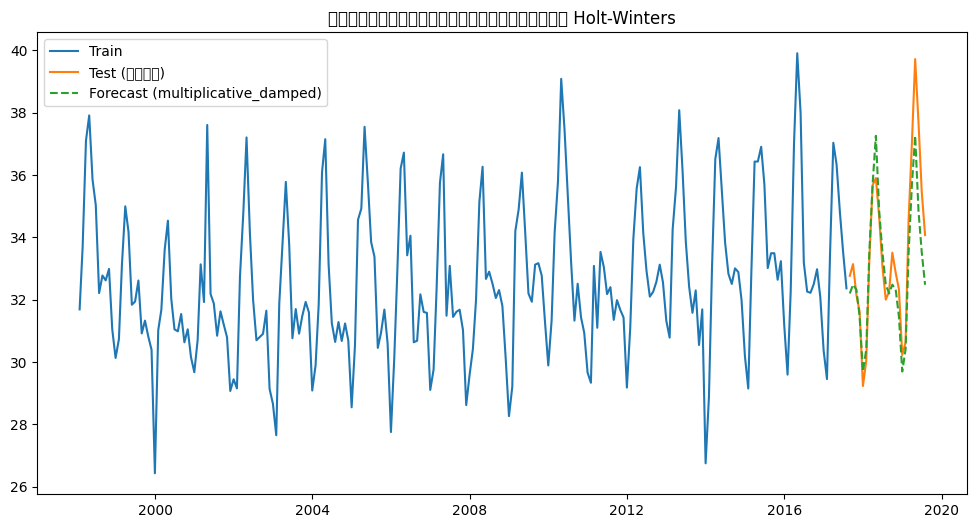

In [18]:

plt.show()
best_model_name = min(results, key=results.get)
best_model = models[best_model_name]

print("โมเดลที่ดีที่สุดคือ:", best_model_name, "ด้วย RMSE =", results[best_model_name])

# ทำนายด้วยโมเดลที่ดีที่สุด
forecast = best_model.forecast(len(test_data))

plt.figure(figsize=(12,6))
plt.plot(train_data.index, train_data, label="Train")
plt.plot(test_data.index, test_data, label="Test (จริง)")
plt.plot(test_data.index, forecast, label=f"Forecast ({best_model_name})", linestyle="--")
plt.legend()
plt.title("ผลการพยากรณ์อุณหภูมิด้วย Holt-Winters")
plt.show()
